# ANN Sederhana untuk Menentukan Penjumlahan (a + b)
Dibuat: 2025-10-24 05:43:15

Tujuan: Melatih jaringan saraf sederhana (MLPRegressor) agar dapat mempelajari fungsi penjumlahan dua bilangan nyata: $y = a + b$.

**Catatan**: Penjumlahan adalah fungsi linear yang bisa dipelajari perfektif oleh model linear. Di sini kita memakai **ANN (MLP)** agar terlihat *pipeline* umum pembelajaran jaringan saraf (data → train → evaluasi → prediksi).

## 1) Import & Setup

In [ ]:
#pip install scikit-learn matplotlib numpy

In [1]:

# %pip install scikit-learn matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler



## 2) Membuat Dataset Penjumlahan
Kita buat pasangan $(a, b)$ acak dalam rentang \([-10, 10]\). Targetnya adalah $y = a + b$.


In [2]:

rng = np.random.RandomState(42)

# Buat data (a, b) dan target y = a + b
N = 8000
a = rng.uniform(-10, 10, size=N)
b = rng.uniform(-10, 10, size=N)
X = np.vstack([a, b]).T  # shape (N, 2)
y = a + b                # shape (N,)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Contoh data:\n", X_train[:5], "\nTarget:\n", y_train[:5])


Contoh data:
 [[-1.86184079  8.18530087]
 [-4.64005466  5.17527501]
 [ 3.53640087 -6.21332493]
 [ 2.14188072 -8.98292062]
 [ 4.05259153  2.16618056]] 
Target:
 [ 6.32346008  0.53522035 -2.67692406 -6.8410399   6.21877209]



## 3) (Opsional tapi disarankan) Scaling Fitur
MLP biasanya lebih stabil jika fitur di-*scale*. Kita pakai **StandardScaler** untuk input dan target.


In [3]:

x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_s = x_scaler.fit_transform(X_train)
X_test_s  = x_scaler.transform(X_test)

y_train_s = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_s  = y_scaler.transform(y_test.reshape(-1, 1)).ravel()



## 4) Melatih ANN (MLPRegressor)
Gunakan 2 hidden layer kecil. Karena fungsi target linear, ini mudah dipelajari.


In [8]:

mlp = MLPRegressor(
    hidden_layer_sizes=(16, 16),
    activation='relu',
    solver='adam',
    learning_rate_init=1e-3,
    max_iter=3000,
    random_state=42
)

mlp.fit(X_train_s, y_train_s)

# Evaluasi pada data test (ingat: inverse transform untuk kembali ke skala asli)
y_pred_s = mlp.predict(X_test_s)
y_pred = y_scaler.inverse_transform(y_pred_s.reshape(-1, 1)).ravel()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE  : {mse:.6f}")
print(f"RMSE : {rmse:.6f}")


MSE  : 0.016981
RMSE : 0.130312



## 5) Visualisasi Kinerja
- Plot **y_true vs y_pred** (garis y=x menandakan prediksi sempurna).

- Plot **error** (y_pred - y_true).


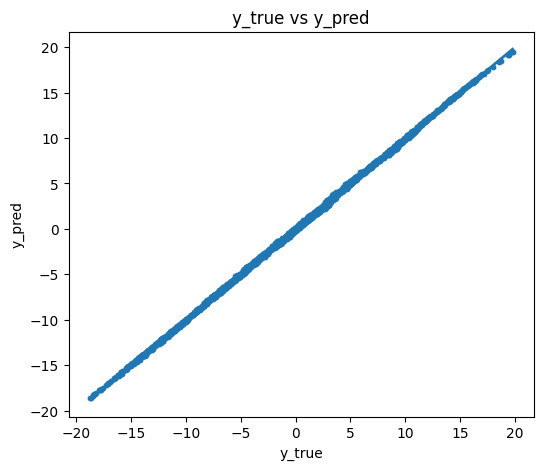

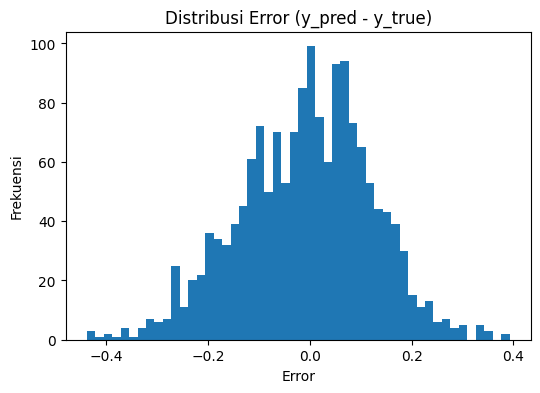

In [9]:

# y_true vs y_pred
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linewidth=2)
plt.title("y_true vs y_pred")
plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.show()

# Error plot
errors = y_pred - y_test
plt.figure(figsize=(6, 4))
plt.hist(errors, bins=50)
plt.title("Distribusi Error (y_pred - y_true)")
plt.xlabel("Error")
plt.ylabel("Frekuensi")
plt.show()



## 6) Uji Prediksi pada Bilangan Tertentu
Coba beberapa contoh (termasuk di luar rentang latih) untuk melihat generalisasi.


In [6]:

def ann_sum(model, x_scaler, y_scaler, a, b):
    X = np.array([[a, b]])
    Xs = x_scaler.transform(X)
    ys = model.predict(Xs).reshape(-1, 1)
    y = y_scaler.inverse_transform(ys).ravel()[0]
    return y

tests = [
    (2.5, 3.1),
    (-7.2, 4.5),
    (10.0, -3.33),
    (123, 456),     # di luar rentang latih -> error kecil mungkin muncul
    (-50, 12.34),   # di luar rentang latih
]

for a,b in tests:
    pred = ann_sum(mlp, x_scaler, y_scaler, a, b)
    print(f"{a} + {b} ≈ {pred:.6f}  |  asli = {a+b:.6f}  |  error = {pred - (a+b):.6e}")


2.5 + 3.1 ≈ 5.673005  |  asli = 5.600000  |  error = 7.300463e-02
-7.2 + 4.5 ≈ -2.601597  |  asli = -2.700000  |  error = 9.840310e-02
10.0 + -3.33 ≈ 6.926914  |  asli = 6.670000  |  error = 2.569138e-01
123 + 456 ≈ 391.399451  |  asli = 579.000000  |  error = -1.876005e+02
-50 + 12.34 ≈ -40.950496  |  asli = -37.660000  |  error = -3.290496e+00



## 7) Variasi & Latihan
- Ganti `activation='identity'` (linear) dan lihat performa.
- Tambah/kurangi ukuran hidden layer.
- Latih pada rentang data lebih besar (mis. [-1000, 1000]) dan uji generalisasi.
- Tambahkan noise pada target untuk meniru kondisi nyata.
